# import lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
def unify_disposition(df, mission):
    """
    Unify planet disposition labels across Kepler, K2, and TESS missions.
    Returns the dataframe with two new columns:
      - 'unified_disposition' : CONFIRMED / CANDIDATE / FALSE_POSITIVE
      - 'mission'             : Kepler / K2 / TESS
    """
    
    mission = mission.upper()
    
    if mission == "KEPLER":
        mapping = {
            "CONFIRMED": "CONFIRMED",
            "CANDIDATE": "CANDIDATE",
            "FALSE POSITIVE": "FALSE_POSITIVE",
        }
        df["koi_disposition"] = df["koi_disposition"].map(mapping)
    
    elif mission == "K2":
        mapping = {
            "CONFIRMED": "CONFIRMED",
            "CANDIDATE": "CANDIDATE",
            "FALSE POSITIVE": "FALSE_POSITIVE",
            "REFUTED": "FALSE_POSITIVE",  # treat REFUTED as false positive
        }
        df["disposition"] = df["disposition"].map(mapping)
    
    elif mission == "TESS":
        mapping = {
            "CP": "CONFIRMED",
            "KP": "CONFIRMED",
            "PC": "CANDIDATE",
            "APC": "CANDIDATE",
            "FP": "FALSE_POSITIVE",
            "FA": "FALSE_POSITIVE",
        }
        df["tfopwg_disp"] = df["tfopwg_disp"].map(mapping)
    
    else:
        raise ValueError(f"Unknown mission: {mission}")

    df["mission"] = mission
    return df


print("✅ Unified disposition mapping applied successfully!")


✅ Unified disposition mapping applied successfully!


In [3]:
def select_unified_columns(df, mission):
    mission = mission.upper()
    if mission == "KEPLER":
        columns = {
            "unified_id": df["kepoi_name"],
            "stellar_id": df["kepid"],
            "disposition": df["koi_disposition"],
            "orbital_period_days": df["koi_period"],
            "transit_duration_hr": df["koi_duration"],
            "transit_depth_ppm": df["koi_depth"],
            "planet_radius_rearth": df["koi_prad"],
            "equilibrium_temp_k": df["koi_teq"],
            "insolation_flux_earth": df["koi_insol"],
            "stellar_teff_k": df["koi_steff"],
            "stellar_radius_rsun": df["koi_srad"],
            "stellar_logg_cgs": df["koi_slogg"],
            "magnitude": df["koi_kepmag"]
        }
    elif mission == "K2":
        columns = {
            "unified_id": df["pl_name"],
            "stellar_id": df["epic_hostname"],
            "disposition": df["disposition"],
            "orbital_period_days": df["pl_orbper"],
            "transit_duration_hr": df["pl_trandur"],
            "transit_depth_ppm": df["pl_trandep"],
            "planet_radius_rearth": df["pl_rade"],
            "equilibrium_temp_k": df["pl_eqt"],
            "insolation_flux_earth": df["pl_insol"],
            "stellar_teff_k": df["st_teff"],
            "stellar_radius_rsun": df["st_rad"],
            "stellar_logg_cgs": df["st_logg"],
            "magnitude": df["sy_kepmag"]
        }
    elif mission == "TESS":
        columns = {
            "unified_id": df["toi"],
            "stellar_id": df["tid"],
            "disposition": df["tfopwg_disp"],
            "orbital_period_days": df["pl_orbper"],
            "transit_duration_hr": df["pl_trandurh"],
            "transit_depth_ppm": df["pl_trandep"],
            "planet_radius_rearth": df["pl_rade"],
            "equilibrium_temp_k": df["pl_eqt"],
            "insolation_flux_earth": df["pl_insol"],
            "stellar_teff_k": df["st_teff"],
            "stellar_radius_rsun": df["st_rad"],
            "stellar_logg_cgs": df["st_logg"],
            "magnitude": df["st_tmag"]
        }
    else:
        raise ValueError(f"Unknown mission: {mission}")
    result = pd.DataFrame(columns)
    result["mission"] = mission
    return result


# import data

In [4]:
kepler = pd.read_csv('tabular_data/cumulative_2025.10.02_21.17.01.csv')
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [5]:
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(117), int64(7), object(17)
memory usage: 10.3+ MB


In [6]:
baseline_kepler = kepler.loc[:, ~kepler.columns.str.contains('err1|err2|err')]

In [7]:
baseline_kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [8]:
print(baseline_kepler.isna().sum().to_string())

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          6817
koi_disposition         0
koi_vet_stat            0
koi_vet_date            0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_disp_prov           0
koi_comment          1209
koi_period              0
koi_time0bk             0
koi_time0               0
koi_eccen             363
koi_longp            9564
koi_impact            363
koi_duration            0
koi_ingress          9564
koi_depth             363
koi_ror               363
koi_srho              321
koi_fittype             0
koi_prad              363
koi_sma               363
koi_incl              364
koi_teq               363
koi_insol             321
koi_dor               363
koi_limbdark_mod      363
koi_ldm_coeff4        363
koi_ldm_coeff3        363
koi_ldm_coeff2        363
koi_ldm_coeff1        363
koi_parm_pro

In [9]:
kepler_unified_disp = unify_disposition(baseline_kepler, "KEPLER")
kepler_unified_all = select_unified_columns(kepler_unified_disp, "KEPLER")
kepler_unified_all.head()

/tmp/ipykernel_48719/2969481354.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["koi_disposition"] = df["koi_disposition"].map(mapping)
/tmp/ipykernel_48719/2969481354.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mission"] = mission


,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
0,K00752.01,10797460,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347,KEPLER
1,K00752.02,10797460,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347,KEPLER
2,K00753.01,10811496,CANDIDATE,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,0.868,4.544,15.436,KEPLER
3,K00754.01,10848459,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597,KEPLER
4,K00755.01,10854555,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509,KEPLER


In [10]:
# Check for redundancy in Kepler planet data by looking for duplicate unified_id values
duplicate_unified_ids_kepler = kepler_unified_all['unified_id'].duplicated(keep=False)
redundant_rows_kepler = kepler_unified_all[duplicate_unified_ids_kepler]

print(f"Number of redundant (duplicate unified_id) rows in Kepler data: {redundant_rows_kepler.shape[0]}")
if not redundant_rows_kepler.empty:
    display(redundant_rows_kepler.sort_values('unified_id'))
else:
    print("No redundant planet entries found in Kepler data.")

Number of redundant (duplicate unified_id) rows in Kepler data: 0
No redundant planet entries found in Kepler data.


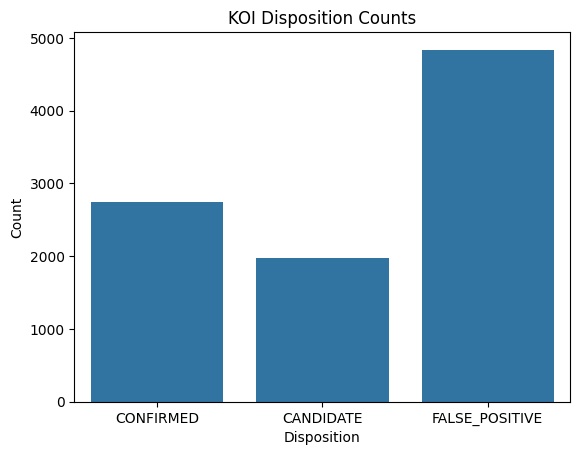

In [11]:
sns.countplot(data=kepler_unified_all, x='disposition')
plt.title('KOI Disposition Counts')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

# TESS

In [12]:
tess = pd.read_csv('tabular_data/TOI_2025.10.02_20.46.33.csv')
tess.head()

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,...,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,...,-0.07,0,1,2.16986,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,...,-0.09,0,1,2.01000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,...,NaN,0,1,5.73000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,...,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,...,-0.07,0,1,2.15000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


In [13]:
tess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 87 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              7703 non-null   int64  
 1   toi                7703 non-null   float64
 2   toipfx             7703 non-null   int64  
 3   tid                7703 non-null   int64  
 4   ctoi_alias         7703 non-null   float64
 5   pl_pnum            7703 non-null   int64  
 6   tfopwg_disp        7703 non-null   object 
 7   rastr              7703 non-null   object 
 8   ra                 7703 non-null   float64
 9   raerr1             0 non-null      float64
 10  raerr2             0 non-null      float64
 11  decstr             7703 non-null   object 
 12  dec                7703 non-null   float64
 13  decerr1            0 non-null      float64
 14  decerr2            0 non-null      float64
 15  st_pmra            7569 non-null   float64
 16  st_pmraerr1        7569 

In [14]:
baseline_tess = tess.loc[:, ~tess.columns.str.contains('err1|err2|err')]
print(baseline_tess.isna().sum().to_string())

rowid                0
toi                  0
toipfx               0
tid                  0
ctoi_alias           0
pl_pnum              0
tfopwg_disp          0
rastr                0
ra                   0
decstr               0
dec                  0
st_pmra            134
st_pmralim         134
st_pmdec           134
st_pmdeclim        134
pl_tranmid           0
pl_tranmidlim        0
pl_orbper          107
pl_orbperlim         0
pl_trandurh          0
pl_trandurhlim       0
pl_trandep           0
pl_trandeplim        0
pl_rade            506
pl_radelim           0
pl_insol           176
pl_insollim       7703
pl_eqt             311
pl_eqtlim         7703
st_tmag              0
st_tmaglim           0
st_dist            215
st_distlim           0
st_teff            161
st_tefflim           0
st_logg            856
st_logglim           0
st_rad             507
st_radlim            0
toi_created          0
rowupdate            0


In [15]:
baseline_tess.head()

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,...,st_dist,st_distlim,st_teff,st_tefflim,st_logg,st_logglim,st_rad,st_radlim,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,-12d41m45.46s,...,485.735,0,10249.0,0,4.19,0,2.16986,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,-05d30m49.87s,...,295.862,0,7070.0,0,4.03,0,2.01000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,-10d34m49.64s,...,943.109,0,8924.0,0,NaN,0,5.73000,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,-25d12m25.26s,...,7728.170,0,5388.5,0,4.15,0,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,-48d48m10.12s,...,356.437,0,9219.0,0,4.14,0,2.15000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [16]:
tess_unified_disp = unify_disposition(baseline_tess, "TESS")
tess_unified_all = select_unified_columns(tess_unified_disp, "TESS")
tess_unified_all.head()

/tmp/ipykernel_48719/2969481354.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tfopwg_disp"] = df["tfopwg_disp"].map(mapping)
/tmp/ipykernel_48719/2969481354.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mission"] = mission


,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
0,1000.01,50365310,FALSE_POSITIVE,2.171348,2.01722,656.886099,5.818163,3127.204052,22601.948581,10249.0,2.16986,4.19,9.604000,TESS
1,1001.01,88863718,CANDIDATE,1.931646,3.16600,1286.000000,11.215400,4045.000000,44464.500000,7070.0,2.01000,4.03,9.423440,TESS
2,1002.01,124709665,FALSE_POSITIVE,1.867557,1.40800,1500.000000,23.752900,2037.000000,2860.610000,8924.0,5.73000,NaN,9.299501,TESS
3,1003.01,106997505,FALSE_POSITIVE,2.743230,3.16700,383.410000,NaN,1631.000000,1177.360000,5388.5,NaN,4.15,9.300300,TESS
4,1004.01,238597883,FALSE_POSITIVE,3.573014,3.37000,755.000000,11.311300,4260.000000,54679.300000,9219.0,2.15000,4.14,9.135500,TESS


In [17]:
# Check for redundancy in TESS planet data by looking for duplicate unified_id values
duplicate_unified_ids = tess_unified_all['unified_id'].duplicated(keep=False)
redundant_rows = tess_unified_all[duplicate_unified_ids]

print(f"Number of redundant (duplicate unified_id) rows in TESS data: {redundant_rows.shape[0]}")
if not redundant_rows.empty:
    display(redundant_rows.sort_values('unified_id'))
else:
    print("No redundant planet entries found in TESS data.")

Number of redundant (duplicate unified_id) rows in TESS data: 0
No redundant planet entries found in TESS data.


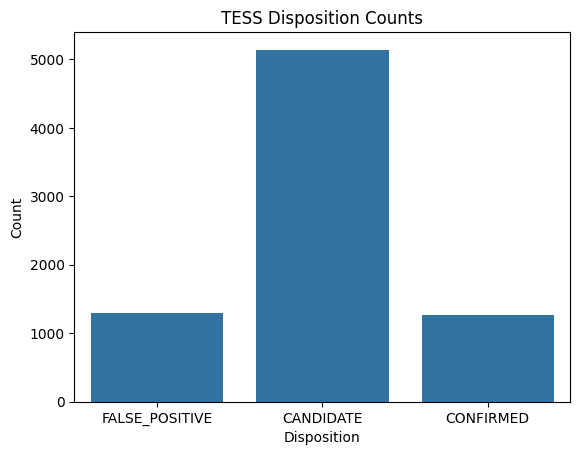

In [18]:
sns.countplot(data=tess_unified_all, x='disposition')
plt.title('TESS Disposition Counts')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

# K2

In [19]:
k2 = pd.read_csv('tabular_data/k2pandc_2025.10.02_20.47.13.csv')
k2.head()

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-02-15,1,4,1.0,0,0,0,0,0,0
1,2,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2016-07-28,1,4,1.0,0,0,0,0,0,0
2,3,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-04-26,1,4,1.0,0,0,0,0,0,0
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0,10,1.0,0,0,0,0,0,0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0,10,1.0,0,0,0,0,0,0


In [20]:
if 'releasedate' in k2.columns:
    k2['releasedate'] = pd.to_datetime(k2['releasedate'], format='mixed', errors='coerce')
    k2_cleaned = k2.sort_values('releasedate').drop_duplicates(subset='pl_name', keep='last')
    k2 = k2_cleaned  # Overwrite k2 with the cleaned DataFrame
else:
    print("Column 'releasedate' not found in k2 DataFrame.")
k2.head()

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
322,323,EPIC 204576757.01,EPIC 204576757,NaN,NaN,EPIC 204576757,EPIC 204576757.01,NaN,NaN,TIC 204750233,...,2015-12-05,0,2,1.0,0,0,0,0,0,0
247,248,EPIC 202634963.01,EPIC 202634963,NaN,NaN,EPIC 202634963,EPIC 202634963.01,NaN,NaN,TIC 68161800,...,2015-12-05,0,2,1.0,0,0,0,0,0,0
233,234,EPIC 202126847.01,EPIC 202126847,NaN,NaN,EPIC 202126847,EPIC 202126847.01,NaN,NaN,TIC 445959194,...,2015-12-05,0,0,1.0,0,0,0,0,0,0
225,226,EPIC 202092480.01,EPIC 202092480,NaN,NaN,EPIC 202092480,EPIC 202092480.01,NaN,NaN,TIC 87474573,...,2015-12-05,0,0,1.0,0,0,0,0,0,0
260,261,EPIC 202843107.01,EPIC 202843107,NaN,NaN,EPIC 202843107,EPIC 202843107.01,NaN,NaN,TIC 392037308,...,2015-12-05,0,2,1.0,0,0,0,0,0,0


In [21]:
k2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1806 entries, 322 to 1857
Columns: 295 entries, rowid to pl_ndispec
dtypes: datetime64[ns](1), float64(236), int64(26), object(32)
memory usage: 4.1+ MB


In [22]:
baseline_k2 = k2.loc[:, ~k2.columns.str.contains('err1|err2|err')]
print(baseline_k2.isna().sum().to_string())

rowid                  0
pl_name                0
hostname               0
pl_letter           1223
k2_name             1220
epic_hostname          1
epic_candname        118
hd_name             1776
hip_name            1775
tic_id                 3
gaia_id               36
default_flag           0
disposition            0
disp_refname           0
sy_snum                0
sy_pnum                0
sy_mnum                0
cb_flag                0
discoverymethod        0
disc_year              0
disc_refname           0
disc_pubdate           0
disc_locale            0
disc_facility          0
disc_telescope         0
disc_instrument        0
rv_flag                0
pul_flag               0
ptv_flag               0
tran_flag              0
ast_flag               0
obm_flag               0
micro_flag             0
etv_flag               0
ima_flag               0
dkin_flag              0
soltype                0
pl_controv_flag        0
pl_refname             0
pl_orbper             26


In [23]:
baseline_k2.head()

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
322,323,EPIC 204576757.01,EPIC 204576757,NaN,NaN,EPIC 204576757,EPIC 204576757.01,NaN,NaN,TIC 204750233,...,2015-12-05,0,2,1.0,0,0,0,0,0,0
247,248,EPIC 202634963.01,EPIC 202634963,NaN,NaN,EPIC 202634963,EPIC 202634963.01,NaN,NaN,TIC 68161800,...,2015-12-05,0,2,1.0,0,0,0,0,0,0
233,234,EPIC 202126847.01,EPIC 202126847,NaN,NaN,EPIC 202126847,EPIC 202126847.01,NaN,NaN,TIC 445959194,...,2015-12-05,0,0,1.0,0,0,0,0,0,0
225,226,EPIC 202092480.01,EPIC 202092480,NaN,NaN,EPIC 202092480,EPIC 202092480.01,NaN,NaN,TIC 87474573,...,2015-12-05,0,0,1.0,0,0,0,0,0,0
260,261,EPIC 202843107.01,EPIC 202843107,NaN,NaN,EPIC 202843107,EPIC 202843107.01,NaN,NaN,TIC 392037308,...,2015-12-05,0,2,1.0,0,0,0,0,0,0


In [24]:
k2_unified_disp = unify_disposition(baseline_k2, "K2")
k2_unified_all = select_unified_columns(k2_unified_disp, "K2")
k2_unified_all.head()

/tmp/ipykernel_48719/2969481354.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["disposition"] = df["disposition"].map(mapping)
/tmp/ipykernel_48719/2969481354.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mission"] = mission


,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
322,EPIC 204576757.01,EPIC 204576757,CANDIDATE,23.277669,4.75,19.80,32.8,NaN,NaN,4379.0,0.68,NaN,13.668,K2
247,EPIC 202634963.01,EPIC 202634963,CANDIDATE,28.707623,3.61,3.57,21.2,NaN,NaN,5838.0,1.03,NaN,12.100,K2
233,EPIC 202126847.01,EPIC 202126847,CANDIDATE,4.168792,6.61,1.69,16.1,NaN,NaN,6005.0,1.14,NaN,12.400,K2
225,EPIC 202092480.01,EPIC 202092480,CANDIDATE,2.844533,5.69,26.50,65.3,NaN,NaN,6045.0,1.16,NaN,10.600,K2
260,EPIC 202843107.01,EPIC 202843107,CANDIDATE,2.198904,6.83,32.40,46.6,NaN,NaN,4938.0,0.75,NaN,11.829,K2


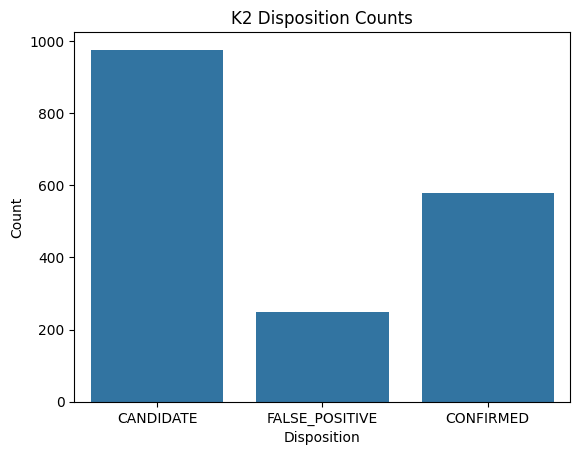

In [25]:
sns.countplot(data = k2_unified_all, x='disposition')
plt.title('K2 Disposition Counts')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

# combine all the data

In [26]:
combined_all = pd.concat([kepler_unified_all, tess_unified_all, k2_unified_all], ignore_index=True)
combined_all.head()

,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
0,K00752.01,10797460,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347,KEPLER
1,K00752.02,10797460,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347,KEPLER
2,K00753.01,10811496,CANDIDATE,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,0.868,4.544,15.436,KEPLER
3,K00754.01,10848459,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597,KEPLER
4,K00755.01,10854555,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509,KEPLER


In [27]:
# Combine all unified DataFrames and save to CSV
combined_all = pd.concat([kepler_unified_all, tess_unified_all, k2_unified_all], ignore_index=True)
combined_all.to_csv('tabular_data/combined_all.csv', index=False)

# Write explanation to info/all.txt
with open('tabular_data/info/all.txt', 'w') as f:
    f.write(
        "combined_all.csv contains unified exoplanet candidate and confirmed planet data from Kepler, K2, and TESS missions.\n"
        "Columns are standardized for cross-mission comparison:\n"
        "  - unified_id: Unique planet candidate/planet identifier (KOI, TOI, or K2 name)\n"
        "  - stellar_id: Unique stellar identifier (Kepler ID, TESS ID, or EPIC hostname)\n"
        "  - disposition: Unified planet disposition (CONFIRMED, CANDIDATE, FALSE_POSITIVE)\n"
        "  - orbital_period_days: Orbital period in days\n"
        "  - transit_duration_hr: Transit duration in hours\n"
        "  - transit_depth_ppm: Transit depth in parts per million\n"
        "  - planet_radius_rearth: Planet radius in Earth radii\n"
        "  - equilibrium_temp_k: Planet equilibrium temperature in Kelvin\n"
        "  - insolation_flux_earth: Insolation flux in Earth units\n"
        "  - stellar_teff_k: Stellar effective temperature in Kelvin\n"
        "  - stellar_radius_rsun: Stellar radius in Solar radii\n"
        "  - stellar_logg_cgs: Stellar surface gravity (log g, cgs)\n"
        "  - magnitude: Kepler, TESS, or K2 magnitude\n"
        "  - mission: Mission source (KEPLER, K2, or TESS)\n"
        "See the notebook for details on column mapping and data cleaning steps."
    )

# cleaning the nans

In [28]:
combined_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19073 entries, 0 to 19072
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unified_id             19073 non-null  object 
 1   stellar_id             19072 non-null  object 
 2   disposition            19073 non-null  object 
 3   orbital_period_days    18940 non-null  float64
 4   transit_duration_hr    18654 non-null  float64
 5   transit_depth_ppm      18081 non-null  float64
 6   planet_radius_rearth   17808 non-null  float64
 7   equilibrium_temp_k     16979 non-null  float64
 8   insolation_flux_earth  17019 non-null  float64
 9   stellar_teff_k         17883 non-null  float64
 10  stellar_radius_rsun    18145 non-null  float64
 11  stellar_logg_cgs       17048 non-null  float64
 12  magnitude              19059 non-null  float64
 13  mission                19073 non-null  object 
dtypes: float64(10), object(4)
memory usage: 2.0+ MB


In [29]:
# Count rows in combined_all where any physical column is NaN
physical_columns = [
    'orbital_period_days', 'transit_duration_hr', 'transit_depth_ppm',
    'planet_radius_rearth', 'equilibrium_temp_k', 'insolation_flux_earth',
    'stellar_teff_k', 'stellar_radius_rsun', 'stellar_logg_cgs', 'magnitude'
]
nan_physical = combined_all[physical_columns].isna().any(axis=1)
num_nan_physical = nan_physical.sum()
print(f"Number of combined_all rows with at least one NaN in physical columns: {num_nan_physical}")

Number of combined_all rows with at least one NaN in physical columns: 3142


In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 1️⃣ Drop columns with >50% missing
threshold = 0.5 * len(combined_all)
cols_to_drop = [col for col in physical_columns if combined_all[col].isna().sum() > threshold]
print(f"Dropping columns with >50% missing: {cols_to_drop}")

combined_all_reduced = combined_all.drop(columns=cols_to_drop)
remaining_physical_columns = [col for col in physical_columns if col not in cols_to_drop]

# 2️⃣ Iteratively fill NaNs using correlated columns
max_iter = 5  # number of passes
for it in range(max_iter):
    print(f"\n🔁 Iteration {it+1}/{max_iter}")
    filled_any = False

    for col in remaining_physical_columns:
        missing_mask = combined_all_reduced[col].isna()
        if missing_mask.sum() == 0:
            continue

        # find correlated columns
        corr = combined_all_reduced[remaining_physical_columns].corr()[col].abs().sort_values(ascending=False)
        correlated_cols = [c for c in corr.index if c != col][:5]  # top 5 correlated
        predictors = correlated_cols

        # prepare training data
        train_df = combined_all_reduced.loc[~missing_mask, predictors + [col]].dropna()
        if train_df.shape[0] < 10:
            continue

        X_train = train_df[predictors]
        y_train = train_df[col]
        model = LinearRegression()
        model.fit(X_train, y_train)

        # prepare test data (don’t drop NaNs here; we’ll fill what we can)
        test_df = combined_all_reduced.loc[missing_mask, predictors]
        # drop rows that are entirely NaN in predictors
        test_df = test_df.dropna(how="all")
        if test_df.empty:
            continue

        # fill missing predictors with their column mean temporarily
        test_df_filled = test_df.fillna(combined_all_reduced[predictors].mean())

        preds = model.predict(test_df_filled)
        combined_all_reduced.loc[test_df.index, col] = preds
        filled_any = True
        print(f"Filled {len(test_df)} values in '{col}'.")

    if not filled_any:
        print("No more values could be filled — stopping early.")
        break

# 3️⃣ Show result
print("\n🧾 Remaining missing values per column:")
print(combined_all_reduced[remaining_physical_columns].isna().sum())


Dropping columns with >50% missing: []

🔁 Iteration 1/5
Filled 131 values in 'orbital_period_days'.
Filled 418 values in 'transit_duration_hr'.
Filled 991 values in 'transit_depth_ppm'.
Filled 1264 values in 'planet_radius_rearth'.
Filled 2091 values in 'equilibrium_temp_k'.
Filled 2053 values in 'insolation_flux_earth'.
Filled 1189 values in 'stellar_teff_k'.
Filled 927 values in 'stellar_radius_rsun'.
Filled 2024 values in 'stellar_logg_cgs'.
Filled 13 values in 'magnitude'.

🔁 Iteration 2/5
Filled 2 values in 'orbital_period_days'.
Filled 2 values in 'equilibrium_temp_k'.

🔁 Iteration 3/5
No more values could be filled — stopping early.

🧾 Remaining missing values per column:
orbital_period_days      0
transit_duration_hr      1
transit_depth_ppm        1
planet_radius_rearth     1
equilibrium_temp_k       1
insolation_flux_earth    1
stellar_teff_k           1
stellar_radius_rsun      1
stellar_logg_cgs         1
magnitude                1
dtype: int64


In [31]:
combined_all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19073 entries, 0 to 19072
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unified_id             19073 non-null  object 
 1   stellar_id             19072 non-null  object 
 2   disposition            19073 non-null  object 
 3   orbital_period_days    19073 non-null  float64
 4   transit_duration_hr    19072 non-null  float64
 5   transit_depth_ppm      19072 non-null  float64
 6   planet_radius_rearth   19072 non-null  float64
 7   equilibrium_temp_k     19072 non-null  float64
 8   insolation_flux_earth  19072 non-null  float64
 9   stellar_teff_k         19072 non-null  float64
 10  stellar_radius_rsun    19072 non-null  float64
 11  stellar_logg_cgs       19072 non-null  float64
 12  magnitude              19072 non-null  float64
 13  mission                19073 non-null  object 
dtypes: float64(10), object(4)
memory usage: 2.0+ MB


In [32]:
# Count rows in combined_all where any physical column is NaN
physical_columns = [
    'orbital_period_days', 'transit_duration_hr', 'transit_depth_ppm',
    'planet_radius_rearth', 'equilibrium_temp_k', 'insolation_flux_earth',
    'stellar_teff_k', 'stellar_radius_rsun', 'stellar_logg_cgs', 'magnitude'
]
nan_physical = combined_all_reduced[physical_columns].isna().any(axis=1)
num_nan_physical = nan_physical.sum()
print(f"Number of combined_all rows with at least one NaN in physical columns: {num_nan_physical}")

Number of combined_all rows with at least one NaN in physical columns: 1


In [34]:
nan_rows = combined_all_reduced[combined_all_reduced[physical_columns].isna().any(axis=1)]
display(nan_rows)
combined_all_reduced = combined_all_reduced.drop(nan_rows.index)

,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
18849,K2-2016-BLG-0005L b,NaN,CONFIRMED,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K2


In [35]:
combined_all_reduced.to_csv('tabular_data/cleaned_all.csv', index=False)